In [1]:
# Add the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime


In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the lat and lngs combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-25.7370285100763 158.68781510008546
-63.87383305996621 133.79885644878283
34.77238474052888 147.10969050107633
-71.20642304537972 -36.40134480780358
-71.16321768975726 -4.4766717167485695
-16.05441643880718 -165.23352531054408
-64.90984010096507 40.2730416688124
-2.5328347400312765 143.3844805770023
48.89520474464419 7.798164347054012
-32.955182983031335 -163.71644738864478
55.81019478023586 -41.30351324916484
10.046141551191027 89.43611861613408
41.89652963746744 96.41780460869029
20.905022521735305 -159.35353022920762
13.424202411875754 -164.14155147597975
38.57871694746595 142.16149053023793
54.84562772489906 -11.375750676125847
-68.72325840398103 55.131031716873025
88.12884351559265 24.98467388423407
32.88063344715118 -157.99971753971792
38.33445844163228 34.0414075480285
74.52887881118505 129.78896891113504
-42.130105898384585 -45.187486466319484
83.48809435287643 -126.13839158603241
53.365831216813376 19.272436454890936
-1.9369726176557265 127.1250895971092
16.647131068802878 4.

-68.06320717865138 164.9949441732453
-9.018836742502998 -156.93074983208953
-8.614648486208964 67.1430224068016
-80.08342162588443 29.453840464525115
-88.73534458582262 -113.99577451054034
-68.67806867979128 106.22219592404059
-62.93102695550937 134.30362023195693
73.6830537139416 -170.9757387978857
-78.10056269828056 118.55335233594656
50.80600167104774 -81.31155758784712
56.102875874667774 -81.67991474326934
20.259853008830632 117.13685546726413
-81.33365364493825 -34.996912081321966
73.1905724573432 -101.78748146018808
87.98806826247645 -130.75387437735253
-67.05596204750924 -26.26272378142002
1.524206481546912 142.57145919352814
81.29501424781142 -17.962017016899523
40.98122535212951 27.15533119187728
-49.014898278983274 -67.17398257138566
-88.01849494039823 51.43977082638125
-37.07940841669585 54.39748372314864
-26.298195012747215 -4.723318869166889
44.517216031646996 -45.35613804461195
41.56491222131055 77.66275285436274
-83.70200096109274 -124.942447136619
56.2748960023373 -73.6

In [5]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each lat-lngs combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique - add it to the list of cities
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm processing
print(len(cities))


738


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial" + "&appid=" + weather_api_key
city = "london"

In [7]:
query_url = url + "&q=" + city 

print(query_url)

weather_response = requests.get(query_url)

weather_json = weather_response.json()

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=fd5b605ec1e7f981abdbd862d4ea18e8&q=london


In [8]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
# Create an empty list to hold the weather data

city_data = []

# Build our log

print('Beginning Data Retrieval        ')
print('--------------------------------')


# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 to prevent weather data collection timeouts
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create the endpoint URL for each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Increment the record count
    record_count +=1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the desired data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO Standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%M-%D %H:%M:%S')
        
        # Append the data into the city_data list.
        
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
# If an error is detected, skip the city.
    except:
        print(f'City not found.  Skipping ....')
        pass
    
# Indicate that Data loading is complete.

print('--------------------------------')
print('Data Retrieval Completed        ')
print('--------------------------------')


Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | kawana waters
City not found.  Skipping ....
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | wewak
Processing Record 9 of Set 1 | haguenau
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | yumen
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | kesennuma
City not found.  Skipping ....
Processing Record 16 of Set 1 | westport
Processing Record 17 of Set 1 | taolanaro
City not found.  Skipping ....
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | aksaray
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1

Processing Record 34 of Set 4 | guerrero negro
Processing Record 35 of Set 4 | hastings
Processing Record 36 of Set 4 | wladyslawowo
Processing Record 37 of Set 4 | sobolevo
Processing Record 38 of Set 4 | shahrud
Processing Record 39 of Set 4 | balabac
Processing Record 40 of Set 4 | bolshevik
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | sorland
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | satitoa
City not found.  Skipping ....
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | plettenberg bay
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | naryan-mar
Processing Record 1 of Set 5 | chicama
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | bima
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | banon
Processing Record 7 of Set 

Processing Record 22 of Set 8 | bubaque
Processing Record 23 of Set 8 | comodoro rivadavia
Processing Record 24 of Set 8 | rongcheng
Processing Record 25 of Set 8 | susangerd
Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | mae sot
Processing Record 28 of Set 8 | oberstdorf
Processing Record 29 of Set 8 | kamenskoye
City not found.  Skipping ....
Processing Record 30 of Set 8 | gushikawa
Processing Record 31 of Set 8 | fort saint john
City not found.  Skipping ....
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | miramar
Processing Record 34 of Set 8 | barcelona
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | viligili
City not found.  Skipping ....
Processing Record 37 of Set 8 | belyy yar
Processing Record 38 of Set 8 | killorglin
Processing Record 39 of Set 8 | kasungu
Processing Record 40 of Set 8 | neka
Processing Record 41 of Set 8 | gardner
Processing Record 42 of Set 8 | dargaville
Processing Record 43 of 

Processing Record 7 of Set 12 | sabang
Processing Record 8 of Set 12 | asyut
Processing Record 9 of Set 12 | touros
Processing Record 10 of Set 12 | usila
City not found.  Skipping ....
Processing Record 11 of Set 12 | valparaiso
Processing Record 12 of Set 12 | bilecik
Processing Record 13 of Set 12 | atar
Processing Record 14 of Set 12 | imeni poliny osipenko
Processing Record 15 of Set 12 | whitianga
Processing Record 16 of Set 12 | qingquan
Processing Record 17 of Set 12 | aasiaat
Processing Record 18 of Set 12 | nanpiao
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | ahuimanu
Processing Record 21 of Set 12 | muros
Processing Record 22 of Set 12 | bonavista
Processing Record 23 of Set 12 | alta floresta
Processing Record 24 of Set 12 | lalin
Processing Record 25 of Set 12 | vilcun
Processing Record 26 of Set 12 | quelimane
Processing Record 27 of Set 12 | lujan
Processing Record 28 of Set 12 | bulaevo
Processing Record 29 of Set 12 | cururupu
Process

In [13]:
city_data_df = pd.DataFrame(city_data)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,54.90,69,92,1.99,AU,2022-10-08/31/22 16:10:59
1,Hasaki,35.7333,140.8333,79.29,91,13,19.33,JP,2022-09-08/31/22 16:09:31
2,Ushuaia,-54.8000,-68.3000,49.62,57,40,10.36,AR,2022-06-08/31/22 16:06:32
3,Cape Town,-33.9258,18.4232,72.91,37,0,8.01,ZA,2022-08-08/31/22 16:08:31
4,Alofi,-19.0595,-169.9187,75.51,77,26,3.65,NU,2022-07-08/31/22 16:07:47
...,...,...,...,...,...,...,...,...,...
669,Daru,-9.0763,143.2092,77.88,90,89,14.34,PG,2022-28-08/31/22 16:28:23
670,Oranjemund,-28.5500,16.4333,64.04,58,94,7.87,NA,2022-28-08/31/22 16:28:24
671,Aldan,58.6031,125.3894,34.74,82,1,6.02,RU,2022-23-08/31/22 16:23:26
672,Stolin,51.8912,26.8460,66.69,37,72,9.93,BY,2022-28-08/31/22 16:28:24


In [14]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-10-08/31/22 16:10:59,-42.7826,147.0587,54.90,69,92,1.99
1,Hasaki,JP,2022-09-08/31/22 16:09:31,35.7333,140.8333,79.29,91,13,19.33
2,Ushuaia,AR,2022-06-08/31/22 16:06:32,-54.8000,-68.3000,49.62,57,40,10.36
3,Cape Town,ZA,2022-08-08/31/22 16:08:31,-33.9258,18.4232,72.91,37,0,8.01
4,Alofi,NU,2022-07-08/31/22 16:07:47,-19.0595,-169.9187,75.51,77,26,3.65
...,...,...,...,...,...,...,...,...,...
669,Daru,PG,2022-28-08/31/22 16:28:23,-9.0763,143.2092,77.88,90,89,14.34
670,Oranjemund,NA,2022-28-08/31/22 16:28:24,-28.5500,16.4333,64.04,58,94,7.87
671,Aldan,RU,2022-23-08/31/22 16:23:26,58.6031,125.3894,34.74,82,1,6.02
672,Stolin,BY,2022-28-08/31/22 16:28:24,51.8912,26.8460,66.69,37,72,9.93


In [15]:
# Create the output (export) file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the city data DataFrame to a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')


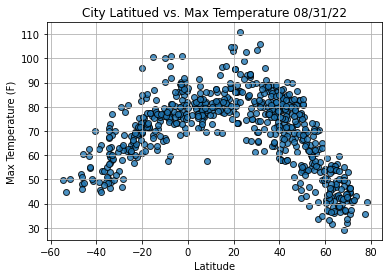

In [20]:
# Import time

import time
import matplotlib.pyplot as plt

# Create a scatter plot for City Latitude vs. Max Temperature

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


plt.scatter(lats,max_temps,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Add the remaining graph properties

plt.title(f'City Latitued vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig1.png')

plt.show()


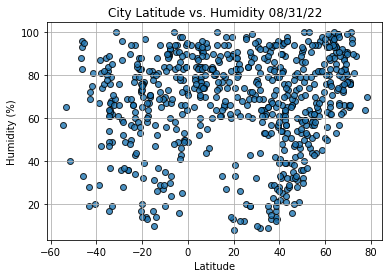

In [23]:
# Create the scatterplot for latitude vs. Humidity

plt.scatter(lats,humidity,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Add the remaining graph properties

plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig2.png')

plt.show()

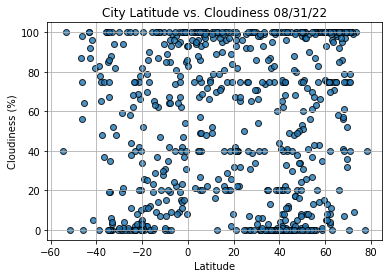

In [25]:
# Create the scatterplot for latitude vs. Cloudiness

plt.scatter(lats,cloudiness,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Add the remaining graph properties

plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig3.png')

plt.show()

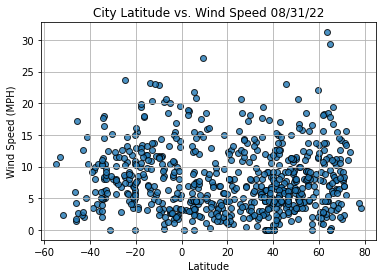

In [26]:
# Create the scatterplot for latitude vs. Wind Speed

plt.scatter(lats,wind_speed,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Add the remaining graph properties

plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig4.png')

plt.show()

In [59]:
# Import linregress

from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot regression line and the equation with the data.

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,stderr) = linregress(x_values,y_values)
    
    # Calculate the regression 'y_values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r')

    # Add annotation for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

    print(f'r Value =  {r_value}')

In [33]:
index13 = city_data_df.loc[13]
index13

City                           Westport
Country                              US
Date          2022-08-08/31/22 16:08:55
Lat                             41.1415
Lng                            -73.3579
Max Temp                          84.02
Humidity                             54
Cloudiness                           20
Wind Speed                         11.5
Name: 13, dtype: object

In [60]:
# Create DataFrames for the Northern and Southern hemispheres

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]


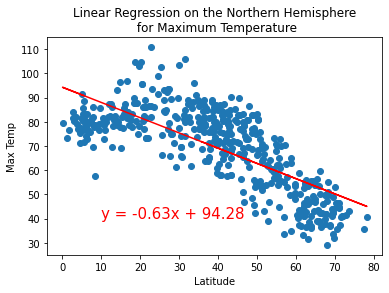

r Value =  -0.7462679110909426


In [61]:
# Perform linear regression on the max temps for the Northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature','Max Temp',(10,40))



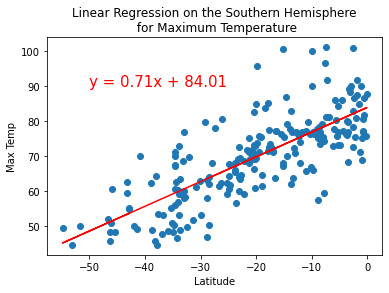

r Value =  0.7637315166987821


In [62]:
# Perform linear regression on the max temps for the Southern hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature','Max Temp',(-50,90))



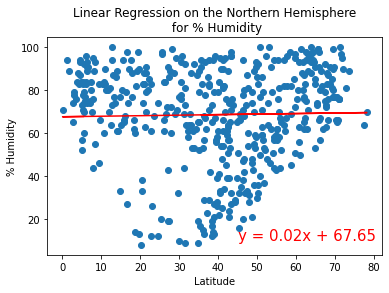

r Value =  0.02188034590826093


In [63]:
# Perform linear regression on the Humidity for the Northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity','% Humidity',(45,10))



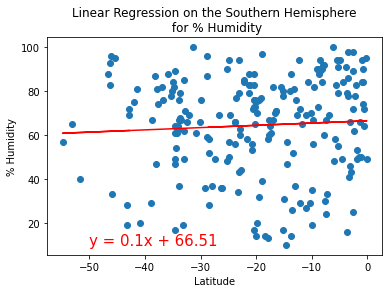

r Value =  0.060498593104297095


In [64]:
# Perform linear regression on the Humidity for the Southern hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity','% Humidity',(-50,10))



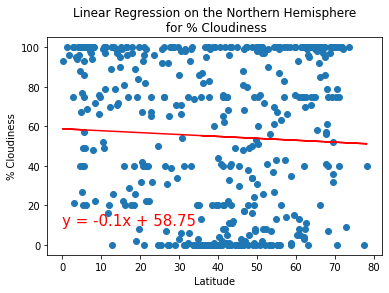

r Value =  -0.04813866657707468


In [66]:
# Perform linear regression on the Cloudiness for the Northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness','% Cloudiness',(0,10))



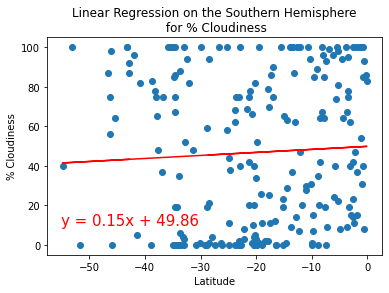

r Value =  0.052991501957678364


In [68]:
# Perform linear regression on the Cloudiness for the Southern hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness','% Cloudiness',(-55,10))



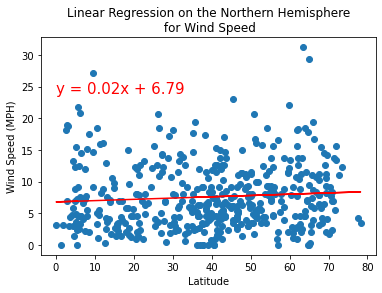

r Value =  0.07814604992032423


In [73]:
# Perform linear regression on the Wind Speed for the Northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed','Wind Speed (MPH)',(0,24))



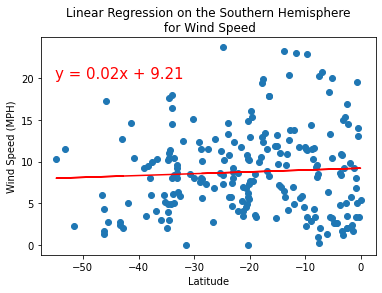

r Value =  0.05682041199575426


In [75]:
# Perform linear regression on the Wind Speed for the Southern hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed','Wind Speed (MPH)',(-55,20))

